# Generate some data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K, D)) # data matrix
y = np.repeat(range(K), N) # class label

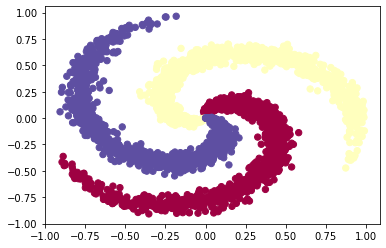

In [10]:
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Train Linear Space

In [79]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))
learning_rate = 0.1
reg = 1e-3

numberExamples = X.shape[0]  # dimX = (NK, D)
iterateNum = 1000
for i in range(iterateNum):
    
    # eval score
    scores = np.dot(X, W) + b  ## (NK, D)*(D, K) = (NK, K)
    
    #compute the class probability
    exp_scores = np.exp(scores)  # (NK, K)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # N*K, K
    
    #compute the softmax loss
    correct_logprobs = -np.log(probs[range(numberExamples), y]) # (NK, K)
    data_loss = np.sum(correct_logprobs) / numberExamples # scaler
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 50 == 0:
        print("iteration %d: loss %f" % (i, loss))
    #compute te gradient on socres
    dscores = probs # (Nk, K)
    dscores[range(numberExamples), y] -= 1
    dscores /= numberExamples  #(N*K, K)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg*W
    
    ## Perform stochastic decent
    W += -learning_rate * dW
    b += -learning_rate * db

iteration 0: loss 1.096648
iteration 50: loss 0.978411
iteration 100: loss 0.908680
iteration 150: loss 0.865251
iteration 200: loss 0.836795
iteration 250: loss 0.817340
iteration 300: loss 0.803572
iteration 350: loss 0.793551
iteration 400: loss 0.786087
iteration 450: loss 0.780421
iteration 500: loss 0.776051
iteration 550: loss 0.772636
iteration 600: loss 0.769936
iteration 650: loss 0.767780
iteration 700: loss 0.766044
iteration 750: loss 0.764636
iteration 800: loss 0.763486
iteration 850: loss 0.762542
iteration 900: loss 0.761763
iteration 950: loss 0.761117


In [18]:
scores = np.dot(X, W) + b
predict_class = np.argmax(scores, axis=1)
print("training accuracy is %.2f" % (np.mean(predict_class == y)))

# Training a Neural Network

In [25]:
# initialize parameters randomly
h = 100 # size of hidden layers
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

In [76]:
learning_rate = 0.1
reg = 1e-3

numberExamples = X.shape[0]  # dimX = (NK, D)
iterateNum = 10000
for i in range(iterateNum):
    
    # eval score
    hidden_layer = np.maximum(0, np.dot(X, W) + b) ## NK, h
    scores = np.dot(hidden_layer, W2) + b2 ## NK, K
    
    #compute the class probability
    exp_scores = np.exp(scores)  # (NK, K)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # N*K, K
    
    #compute the softmax loss
    correct_logprobs = -np.log(probs[range(numberExamples), y]) # (NK, K)
    data_loss = np.sum(correct_logprobs) / numberExamples # scaler
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        upratio = np.mean([np.sum(learning_rate * dW) / np.sum(W), 
                           np.sum(learning_rate * dW2) / np.sum(W2)])
        print("iteration %d: loss %f. The ratio of update %f" % (i, loss, upratio))
    #compute te gradient on socres
    dscores = probs # (Nk, K)
    dscores[range(numberExamples), y] -= 1
    dscores /= numberExamples  #(N*K, K)
    dW2 = np.dot(hidden_layer.T, dscores) # h, k
    db2 = np.sum(dscores, axis=0, keepdims=True) # 1, K
    dW2 += reg*W2
    dhidden = np.dot(dscores, W2.T) ## Nk, h
    dhidden[hidden_layer<=0] = 0. ## backprop Relu non-linearity
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    dW += reg*W
    
    ## Perform stochastic decent
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2

iteration 0: loss 0.245838. The ratio of update 0.000008
iteration 1000: loss 0.245738. The ratio of update 0.000045
iteration 2000: loss 0.245640. The ratio of update -0.000000
iteration 3000: loss 0.245547. The ratio of update 0.000003
iteration 4000: loss 0.245465. The ratio of update 0.000008
iteration 5000: loss 0.245392. The ratio of update 0.000054
iteration 6000: loss 0.245326. The ratio of update 0.000053
iteration 7000: loss 0.245265. The ratio of update 0.000057
iteration 8000: loss 0.245205. The ratio of update 0.000053
iteration 9000: loss 0.245150. The ratio of update 0.000029


In [77]:
hidden_layer = np.maximum(0, np.dot(X, W) + b) ## NK, h
scores = np.dot(hidden_layer, W2) + b2 ## NK, K
predicted_class = np.argmax(scores, axis=1)
print("training accuracy is %.4f" % (np.mean(predicted_class == y)))

training accuracy is 0.9893


# Visualize the decision Boundary

In [54]:
####Visualize the decision Boundary

min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

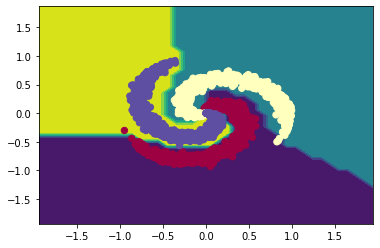

In [78]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
# make predictions for the grid
hidden_layer = np.maximum(0, np.dot(grid, W) + b) ## NK, h
scores = np.dot(hidden_layer, W2) + b2 ## NK, K
yhat = np.argmax(scores, axis=1)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = pyplot.contourf(xx, yy, zz#, cmap='Paired'
                   )
# add a legend, called a color bar
#pyplot.colorbar(c)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

plt.show()

# Compare different gradient decent methods performances

In [131]:
### Define a class including all gradien decent methods
class PramUpdate:
    def __init__(self, learning_rate=0.002, mu=0.95, decay_rate=0.99,
                 beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = learning_rate
        self.v = 0
        self.m = 0
        self.mu = mu     ## Momentutm associate
        self.cache = 0   ## Momentutm associate
        self.decay_rate = decay_rate # RMSprop
        self.beta1 = beta1  # Adam
        self.beta2 = beta2  # Adam
        self.eps = eps     # Adam, Ada, RMSprop
        self.iter = 0
    def SGD(self, dx):
        ## iteration ct + 1
        self.iter += 1
        return -self.lr * dx
    def Momentum(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Momentum update
        self.v = self.mu * self.v - self.lr * dx
        return self.v
    def NestMomentum(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Nesterov Momentum update
        v_pre = self.v # back this up
        self.v = self.mu * self.v - self.lr * dx
        return -self.mu * v_pre + (1 + self.mu) * self.v
    def Adagrad(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Nesterov Momentum update
        self.cache += dx**2 # Update cache
        return - self.lr * dx / (np.sqrt(self.cache) + self.eps)
    def RMSprop(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Nesterov Momentum update
        self.cache = self.decay_rate * self.cache + (1 - self.decay_rate) * dx**2
        return - self.lr * dx / (np.sqrt(self.cache) + self.eps)
    def Adam(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Nesterov Momentum update
        self.m = self.beta1 * self.m + (1 - self.beta1) * dx
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dx**2)
        return - self.lr * self.m / (np.sqrt(self.v) + self.eps)
    def AdamFull(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Nesterov Momentum update
        self.m = self.beta1 * self.m + (1 - self.beta1) * dx
        mt = self.m / (1-self.beta1**self.iter)
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dx**2)
        vt = self.v / (1-self.beta2**self.iter)
        return - self.lr * mt / (np.sqrt(vt) + self.eps)
    def AMSGrad(self, dx):
        ## iteration ct + 1
        self.iter += 1
        ## Nesterov Momentum update
        self.m = self.beta1 * self.m + (1 - self.beta1) * dx
        v_pre = self.v
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dx**2)
        self.v = np.maximum(self.v, v_pre)
        return - self.lr * self.m / (np.sqrt(self.v) + self.eps)

In [102]:
## Define a wrapper for NN training

def NN(X, y, h=100, method="SGD", iterateNum=10000,
       learning_rate=0.1, reg=1e-3):
    # initialize parameters randomly
    #h = 100 # size of hidden layers
    W = 0.01 * np.random.randn(D, h)
    b = np.zeros((1, h))
    W2 = 0.01 * np.random.randn(h, K)
    b2 = np.zeros((1, K))

    numberExamples = X.shape[0]  # dimX = (NK, D)
    W_update = PramUpdate(learning_rate=learning_rate)
    W_updatefnc = getattr(W_update, method)
    W2_update = PramUpdate(learning_rate=learning_rate)
    W2_updatefnc = getattr(W2_update, method) 
    b_update = PramUpdate(learning_rate=learning_rate)
    b_updatefnc = getattr(b_update, method) 
    b2_update = PramUpdate(learning_rate=learning_rate)
    b2_updatefnc = getattr(b2_update, method) 
    for i in range(iterateNum):
    
        # eval score
        hidden_layer = np.maximum(0, np.dot(X, W) + b) ## NK, h
        scores = np.dot(hidden_layer, W2) + b2 ## NK, K
    
        #compute the class probability
        exp_scores = np.exp(scores)  # (NK, K)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # N*K, K
    
        #compute the softmax loss
        correct_logprobs = -np.log(probs[range(numberExamples), y]) # (NK, K)
        data_loss = np.sum(correct_logprobs) / numberExamples # scaler
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            upratio = 0
            if i > 0:
                upratio = np.mean([np.sum(learning_rate * dW) / np.sum(W), 
                               np.sum(learning_rate * dW2) / np.sum(W2)])
            print("iteration %d: loss %f. The ratio of update %f" % (i, loss, upratio))
        #compute te gradient on socres
        dscores = probs # (Nk, K)
        dscores[range(numberExamples), y] -= 1
        dscores /= numberExamples  #(N*K, K)
        dW2 = np.dot(hidden_layer.T, dscores) # h, k
        db2 = np.sum(dscores, axis=0, keepdims=True) # 1, K
        dW2 += reg*W2
        dhidden = np.dot(dscores, W2.T) ## Nk, h
        dhidden[hidden_layer<=0] = 0. ## backprop Relu non-linearity
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)
        dW += reg*W
    
        ## Perform stochastic decent
        
        W += W_updatefnc(dW)
        b += b_updatefnc(db)
        W2 += W2_updatefnc(dW2)
        b2 += b2_updatefnc(db2)
        #W += -learning_rate * dW
        #b += -learning_rate * db
        #W2 += -learning_rate * dW2
        #b2 += -learning_rate * db2
    hidden_layer = np.maximum(0, np.dot(X, W) + b) ## NK, h
    scores = np.dot(hidden_layer, W2) + b2 ## NK, K
    predicted_class = np.argmax(scores, axis=1)
    print("training accuracy is %.4f" % (np.mean(predicted_class == y)))
    return(W, b, W2, b2)

In [104]:
### Simple timer to compute time and duration
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [105]:
#SGD
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="SGD", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098566. The ratio of update 0.000000
iteration 1000: loss 0.691506. The ratio of update -0.000354
iteration 2000: loss 0.622509. The ratio of update 0.000055
iteration 3000: loss 0.479616. The ratio of update 0.000408
iteration 4000: loss 0.395970. The ratio of update 0.000726
iteration 5000: loss 0.361818. The ratio of update -0.001808
iteration 6000: loss 0.342351. The ratio of update -0.000339
iteration 7000: loss 0.327987. The ratio of update -0.000166
iteration 8000: loss 0.313471. The ratio of update -0.000125
iteration 9000: loss 0.301438. The ratio of update -0.000048
training accuracy is 0.9543

 Time taken: 0 hours 0 minutes and 55.26 seconds.


In [106]:
#Momentum
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="Momentum", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098443. The ratio of update 0.000000
iteration 1000: loss 0.315458. The ratio of update 0.000043
iteration 2000: loss 0.302011. The ratio of update 0.000044
iteration 3000: loss 0.300116. The ratio of update 0.000047
iteration 4000: loss 0.299285. The ratio of update 0.000049
iteration 5000: loss 0.298867. The ratio of update 0.000049
iteration 6000: loss 0.298652. The ratio of update 0.000049
iteration 7000: loss 0.298526. The ratio of update 0.000050
iteration 8000: loss 0.298434. The ratio of update 0.000050
iteration 9000: loss 0.298362. The ratio of update 0.000051
training accuracy is 0.9797

 Time taken: 0 hours 0 minutes and 55.81 seconds.


In [109]:
#NestMomentum
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="NestMomentum", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098603. The ratio of update 0.000000
iteration 1000: loss 0.319028. The ratio of update 0.000004
iteration 2000: loss 0.303584. The ratio of update 0.000047
iteration 3000: loss 0.299396. The ratio of update 0.000047
iteration 4000: loss 0.298498. The ratio of update 0.000053
iteration 5000: loss 0.298329. The ratio of update 0.000054
iteration 6000: loss 0.298246. The ratio of update 0.000054
iteration 7000: loss 0.298185. The ratio of update 0.000054
iteration 8000: loss 0.298146. The ratio of update 0.000051
iteration 9000: loss 0.298112. The ratio of update 0.000053
training accuracy is 0.9790

 Time taken: 0 hours 0 minutes and 50.99 seconds.


In [123]:
#RMSprop
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="RMSprop", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098580. The ratio of update 0.000000
iteration 1000: loss 0.247455. The ratio of update -0.000074
iteration 2000: loss 0.257769. The ratio of update 0.000227
iteration 3000: loss 0.258533. The ratio of update -0.001311
iteration 4000: loss 0.254312. The ratio of update -0.006364
iteration 5000: loss 0.246115. The ratio of update -0.000045
iteration 6000: loss 0.246107. The ratio of update -0.000093
iteration 7000: loss 0.246755. The ratio of update -0.000122
iteration 8000: loss 0.265158. The ratio of update -0.000091
iteration 9000: loss 0.247111. The ratio of update -0.000174
training accuracy is 0.9893

 Time taken: 0 hours 0 minutes and 47.77 seconds.


In [111]:
#Adam
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="Adam", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098617. The ratio of update 0.000000
iteration 1000: loss 0.248059. The ratio of update 0.000052
iteration 2000: loss 0.248079. The ratio of update -0.000015
iteration 3000: loss 0.248040. The ratio of update -0.000021
iteration 4000: loss 0.248096. The ratio of update -0.000152
iteration 5000: loss 0.248107. The ratio of update 0.000037
iteration 6000: loss 0.248528. The ratio of update -0.000159
iteration 7000: loss 0.248057. The ratio of update 0.000234
iteration 8000: loss 0.248462. The ratio of update -0.000177
iteration 9000: loss 0.248113. The ratio of update 0.000192
training accuracy is 0.9890

 Time taken: 0 hours 0 minutes and 51.01 seconds.


In [112]:
#AdamFull
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="AdamFull", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098584. The ratio of update 0.000000
iteration 1000: loss 0.243690. The ratio of update 0.000075
iteration 2000: loss 0.243457. The ratio of update 0.000080
iteration 3000: loss 0.244011. The ratio of update 0.000079
iteration 4000: loss 0.243544. The ratio of update 0.000002
iteration 5000: loss 0.244854. The ratio of update 0.000003
iteration 6000: loss 0.243582. The ratio of update -0.000058
iteration 7000: loss 0.243685. The ratio of update 0.000159
iteration 8000: loss 0.243442. The ratio of update -0.000040
iteration 9000: loss 0.242801. The ratio of update 0.000023
training accuracy is 0.9883

 Time taken: 0 hours 0 minutes and 55.6 seconds.


In [132]:
#AMSGrad
start_time = timer()
W, b, W2, b2 = NN(X,y,h=100, method="AMSGrad", iterateNum=10000,
                  learning_rate=0.1, reg=1e-3)
timer(start_time)

iteration 0: loss 1.098611. The ratio of update 0.000000
iteration 1000: loss 0.245357. The ratio of update 0.000050
iteration 2000: loss 0.244272. The ratio of update 0.000053
iteration 3000: loss 0.244064. The ratio of update 0.000058
iteration 4000: loss 0.243808. The ratio of update 0.000058
iteration 5000: loss 0.243494. The ratio of update 0.000055
iteration 6000: loss 0.243360. The ratio of update 0.000034
iteration 7000: loss 0.243329. The ratio of update 0.000030
iteration 8000: loss 0.243317. The ratio of update 0.000040
iteration 9000: loss 0.243318. The ratio of update 0.000032
training accuracy is 0.9893

 Time taken: 0 hours 0 minutes and 51.47 seconds.
